In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
files_in_directory =  os.listdir()
files_in_directory

['.ipynb_checkpoints',
 'Google Ads Portfolio Optimization presentation.pptx',
 'GOSHC Ad Campaign case study.pbix',
 'GOSHC Data Analyst - Recruitment Presentation Task.xlsx',
 'goshc modeling data.csv',
 'Python - modeling.ipynb',
 'Python code GOSHC case study.ipynb',
 'SQL code - Google Ads.txt']

In [3]:
file = pd.ExcelFile(files_in_directory[3])

In [4]:
file.sheet_names

['Case Study instructions', 'Glossary', 'Dataset']

In [5]:
df = file.parse('Dataset', usecols= 'A:M')

In [6]:
df.tail()

,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,Total Cost,Conversions,Revenue per unit sold,Total Revenue
141,Alternative Gifts,gosh bear ward alternative gift,7,Above average,Average,Average,3,15533,724.873333,103.553333,50.720000,10.0,507.200000
142,Gifts and Banker Products,adult unisex hoodie,4,Average,Average,Below average,10,6320,168.533333,42.133333,7.149321,32.0,228.778281
143,Gifts and Banker Products,adult unisex sweatshirt,4,Average,Average,Below average,8,1936,51.626667,12.906667,2.105263,28.0,58.947368
144,Christmas Cards,away in a manger christmas card,5,Below average,Above average,Below average,4,7575,252.500000,50.500000,12.668990,4.5,57.010453
145,Christmas Cards,a very merry christmas christmas card,5,Below average,Above average,Below average,8,10400,346.666667,69.333333,18.024263,2.5,45.060659


#### creating integer columns for 'Quality Score' factors ratings 

In [7]:
df['Ad relevance'].unique()

array(['Below average', 'Above average', 'Average'], dtype=object)

In [8]:
df['Ad relevance score'] = df['Ad relevance'].map({'Below average': 0, 'Above average': 2, 'Average': 1})

In [9]:
df['Expected click-through rate'].unique()

array(['Below average', 'Above average', 'Average'], dtype=object)

In [10]:
df['Expected CTR score'] = df['Expected click-through rate'].map({'Below average': 0, 'Above average': 3.5, 'Average': 1.75})

In [11]:
df['Landing page experience'].unique()

array(['Average', 'Above average', 'Below average'], dtype=object)

In [12]:
df['Landing page exp score'] = df['Landing page experience'].map({'Average': 1.75, 'Above average': 3.5, 'Below average': 0})

In [13]:
df['Clicks'] = round(df['Clicks'])
df['Clicks'] = df['Clicks'].astype(int)
df['Conversions'] = round(df['Conversions'])
df['Conversions'] = df['Conversions'].astype(int)
df['Total Cost'] = round(df['Total Cost'], 2)
df['Total Revenue'] = round(df['Total Revenue'], 2)

In [14]:
df.head(3)

,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,Total Cost,Conversions,Revenue per unit sold,Total Revenue,Ad relevance score,Expected CTR score,Landing page exp score
0,Gifts and Banker Products,rorys story cubes,3,Below average,Below average,Average,7,1935,39,12.90,1,9.99,12.72,0,0.0,1.75
1,Gifts and Banker Products,gosh christmas frankincense candle,10,Above average,Above average,Above average,2,28400,1893,189.33,186,25.00,4658.37,2,3.5,3.50
2,Gifts and Banker Products,gosh dobble,10,Above average,Above average,Above average,1,15600,1040,104.00,104,12.99,1346.55,2,3.5,3.50


#### Pearson correlation matrix of Quality Score and its Factors

In [15]:
df1 = df[['Quality score', 'Ad relevance score',
       'Expected CTR score', 'Landing page exp score']]

<AxesSubplot:>

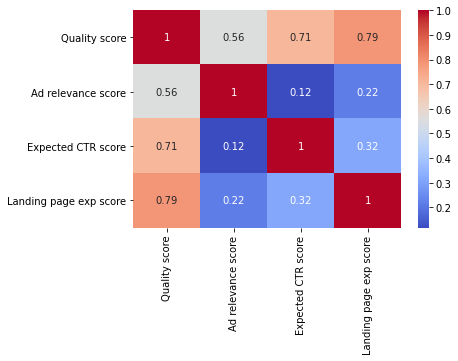

In [16]:
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')

#### checking statistical significance of pearson correlation above at 99% confidence level

In [17]:
from scipy import stats

In [18]:
stats.pearsonr(df1['Quality score'], df1['Landing page exp score'])

(0.7889391371015998, 2.9336664740909717e-32)

In [19]:
for factor_score in df1.columns[1:]:
    correlation, p_value = stats.pearsonr(df1['Quality score'], df1[factor_score])
    if p_value < 0.01:
        print(f" {factor_score} has a statistically Significant correlation of {round(correlation, 2)} with Quality Score")
    else: 
        print(f" {factor_score} has a statistically Insignificant correlation of {round(correlation, 2)} with Quality Score")

 Ad relevance score has a statistically Significant correlation of 0.56 with Quality Score
 Expected CTR score has a statistically Significant correlation of 0.71 with Quality Score
 Landing page exp score has a statistically Significant correlation of 0.79 with Quality Score


### duplicate bids on same keyword

In [20]:
df[df.duplicated(subset= 'Search Keyword', keep= False)]

,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,Total Cost,Conversions,Revenue per unit sold,Total Revenue,Ad relevance score,Expected CTR score,Landing page exp score
50,Gifts and Banker Products,posting christmas stocking gift bag large,7,Average,Average,Above average,3,17248,805,114.99,46,1.6,74.38,1,1.75,3.5
51,Gifts and Banker Products,posting christmas stocking gift bag large,7,Average,Average,Above average,2,24206,1130,161.37,79,1.4,110.06,1,1.75,3.5
65,Gifts and Banker Products,gosh water bottle,10,Above average,Above average,Above average,1,12600,840,84.00,84,12.0,1008.00,2,3.50,3.5
66,Gifts and Banker Products,gosh water bottle,10,Above average,Above average,Above average,2,36800,2453,245.33,245,12.0,2942.71,2,3.50,3.5


In [21]:
df.head(2)

,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,Total Cost,Conversions,Revenue per unit sold,Total Revenue,Ad relevance score,Expected CTR score,Landing page exp score
0,Gifts and Banker Products,rorys story cubes,3,Below average,Below average,Average,7,1935,39,12.90,1,9.99,12.72,0,0.0,1.75
1,Gifts and Banker Products,gosh christmas frankincense candle,10,Above average,Above average,Above average,2,28400,1893,189.33,186,25.00,4658.37,2,3.5,3.50


### Search Keywords similarity

In [22]:
import numpy as np
from fuzzywuzzy import process, fuzz

C:\Users\tuneG\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [23]:
process.extract('posting christmas stocking gift bag large', list(df['Search Keyword']), scorer=fuzz.token_sort_ratio)

[('posting christmas stocking gift bag large', 100),
 ('posting christmas stocking gift bag large', 100),
 ('posting christmas stockings christmas card ', 77),
 ('reindeer and stocking christmas card ', 65),
 ('seasons greetings christmas card ', 63)]

In [24]:
def high_similarity_keywords():
    unique_search_words =  df['Search Keyword'].unique()
    matches_list = []
    for keyword in unique_search_words:
        for match_result in process.extract(keyword, unique_search_words, scorer=fuzz.token_sort_ratio):
            score_tuple =  (keyword,) + match_result
            matches_list.append(score_tuple)

    similarity_df = pd.DataFrame(matches_list, columns=['keyword','match_keyword','score'])
    similarity_df['keyword_compared'] = np.minimum(similarity_df['keyword'], similarity_df['match_keyword'])

    high_score_df = similarity_df[(similarity_df['score'] >= 75) &
                (similarity_df['keyword'] !=  similarity_df['match_keyword']) &
                (similarity_df['keyword_compared'] != similarity_df['match_keyword'])]
    
    high_score_df.drop('keyword_compared',axis=1, inplace = True)
    
    high_similarity_df = high_score_df.groupby(['keyword']).agg(
                        {'score': np.mean,'match_keyword': ",  ".join}).sort_values(
                        ['keyword'], ascending=False).reset_index()
    
    high_similarity_df['score'] = np.round(high_similarity_df['score'])
    high_similarity_df['score'] = high_similarity_df['score'].astype(int)
    return high_similarity_df

In [25]:
similar_keywords_df =  high_similarity_keywords()

C:\Users\tuneG\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
similar_keywords_df.head()

,keyword,score,match_keyword
0,twelve days of christmas christmas card,77,wonderful christmas christmas card
1,the kings journey christmas card,79,we three kings christmas card
2,star of wonder christmas card,77,"wonderful christmas christmas card , starry n..."
3,santa dash christmas card,78,"santas bus ride christmas card , starry night..."
4,santa and reindeer christmas card,80,"santas bus ride christmas card , snowman and ..."


In [27]:
matches_df = similar_keywords_df['match_keyword'].str.split(',', expand = True)

In [28]:
redundant_keywords_dfs =  pd.concat([similar_keywords_df[['keyword', 'score']], matches_df], axis = 1)

In [29]:
redundant_keywords_dfs.columns = ['keyword', 'score', 'match1', 'match2', 'match3', 'match4']

In [30]:
redundant_keywords_dfs.head(10)

,keyword,score,match1,match2,match3,match4
0,twelve days of christmas christmas card,77,wonderful christmas christmas card,None,None,None
1,the kings journey christmas card,79,we three kings christmas card,None,None,None
2,star of wonder christmas card,77,wonderful christmas christmas card,starry night christmas card,None,None
3,santa dash christmas card,78,santas bus ride christmas card,starry night christmas card,None,None
4,santa and reindeer christmas card,80,santas bus ride christmas card,snowman and presents christmas card,None,None
5,reindeer christmas card,80,santa and reindeer christmas card,star of wonder christmas card,None,None
6,reindeer and stocking christmas card,82,santa and reindeer christmas card,reindeer christmas card,None,None
7,posting christmas stocking gift bag large,77,posting christmas stockings christmas card,None,None,None
8,peter rabbit christmas sack,90,peter rabbit christmas stocking,None,None,None
9,peter rabbit christmas mug,80,peter rabbit christmas sack,peter rabbit christmas stocking,None,None


#### data to be stored in database

In [31]:
df = df.reset_index()

In [32]:
df.head(3)

,index,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,Total Cost,Conversions,Revenue per unit sold,Total Revenue,Ad relevance score,Expected CTR score,Landing page exp score
0,0,Gifts and Banker Products,rorys story cubes,3,Below average,Below average,Average,7,1935,39,12.90,1,9.99,12.72,0,0.0,1.75
1,1,Gifts and Banker Products,gosh christmas frankincense candle,10,Above average,Above average,Above average,2,28400,1893,189.33,186,25.00,4658.37,2,3.5,3.50
2,2,Gifts and Banker Products,gosh dobble,10,Above average,Above average,Above average,1,15600,1040,104.00,104,12.99,1346.55,2,3.5,3.50


In [33]:
#df.to_csv('goshc modeling data.csv', index = False)

### Connection to cloud database

In [34]:
import pypyodbc as podbc

In [35]:
# conn2 = podbc.connect('Driver={SQL Server};'
#                                 'Server=xxxxxx.cahwy5tcsa.us-east-1.rds.amazonaws.com,xxxx;'
#                                 'Database=GOSHC;'
#                                 'uid=xxxxx;pwd=xxxxxxx')
# print ("Connected")
# cursor = conn2.cursor()

#### Create 'campaign data' table for data in database

In [36]:
# create_table = '''
# CREATE TABLE campaign_data (
#     serial_no INT NOT NULL,
#     Ad_Group VARCHAR(100) NOT NULL,
#     Search_Keyword VARCHAR(MAX) NOT NULL,
#     Quality_Score INT NOT NULL,
#     Ad_relevance_Score INT,
#     Expected_CTR_Score DECIMAL(3,2),
#     Landing_page_exp_Score DECIMAL(3,2),
#     Ad_relevance VARCHAR(16) NOT NULL,
#     Expected_CTR VARCHAR(16) NOT NULL,
#     Landing_page_experience VARCHAR(16) NOT NULL,
#     Avg_position INT ,
#     Impressions INT,
#     Clicks INT,
#     Total_Cost DECIMAL(8,2),
#     Conversions INT,
#     Revenue_per_unit_sold DECIMAL(8,2),
#     Total_Revenue DECIMAL(8,2)
# )
# '''

In [37]:
# cursor.execute(create_table)

In [38]:
# conn2.commit()

In [39]:
df.shape

(146, 17)

#### function for inserting data into db table

In [40]:
def insert_data_to_table(serial_no, Ad_Group, Search_Keyword, Quality_Score, Ad_relevance_Score,
                        Expected_CTR_Score, Landing_page_exp_Score, Ad_relevance, Expected_CTR, Landing_page_experience,
                        Avg_position, Impressions, Clicks, Total_Cost,  Conversions, Revenue_per_unit_sold, Total_Revenue):
    query = '''
            INSERT INTO campaign_data(serial_no, Ad_Group, Search_Keyword, Quality_Score, Ad_relevance_Score,
                             Expected_CTR_Score, Landing_page_exp_Score, Ad_relevance, Expected_CTR, Landing_page_experience,
                             Avg_position, Impressions, Clicks, Total_Cost,  Conversions, Revenue_per_unit_sold, Total_Revenue
                             )
              VALUES 
              (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
            '''

    row_values_to_insert = (serial_no, Ad_Group, Search_Keyword, Quality_Score, Ad_relevance_Score,
                        Expected_CTR_Score, Landing_page_exp_Score, Ad_relevance, Expected_CTR, Landing_page_experience,
                        Avg_position, Impressions, Clicks, Total_Cost,  Conversions, Revenue_per_unit_sold, Total_Revenue)
    
    cursor.execute(query, row_values_to_insert)

#### function for using above function

In [41]:
def add_data(df):
    for i, row in df.iterrows():
        insert_data_to_table(row['index'], row['Ad Group'], row['Search Keyword'], row['Quality score'],
                        row['Ad relevance score'], row['Expected CTR score'], row['Landing page exp score'],
                        row['Ad relevance'], row['Expected click-through rate'], row['Landing page experience'],
                        row['Avg. position'], row['Impressions '], row['Clicks'], row['Total Cost'], row['Conversions'],
                         row['Revenue per unit sold'], row['Total Revenue'] )

In [42]:
#add_data(df)

In [43]:
#conn2.commit()

In [44]:
#conn2.close()

In [45]:
df.head(2)

,index,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,Total Cost,Conversions,Revenue per unit sold,Total Revenue,Ad relevance score,Expected CTR score,Landing page exp score
0,0,Gifts and Banker Products,rorys story cubes,3,Below average,Below average,Average,7,1935,39,12.90,1,9.99,12.72,0,0.0,1.75
1,1,Gifts and Banker Products,gosh christmas frankincense candle,10,Above average,Above average,Above average,2,28400,1893,189.33,186,25.00,4658.37,2,3.5,3.50


In [46]:
df['Conversion rate'] = df['Conversions'] / df['Clicks']
df['CPC'] = df['Total Cost'] / df['Clicks']

In [47]:
df.head(10)

,index,Ad Group,Search Keyword,Quality score,Ad relevance,Expected click-through rate,Landing page experience,Avg. position,Impressions,Clicks,Total Cost,Conversions,Revenue per unit sold,Total Revenue,Ad relevance score,Expected CTR score,Landing page exp score,Conversion rate,CPC
0,0,Gifts and Banker Products,rorys story cubes,3,Below average,Below average,Average,7,1935,39,12.90,1,9.99,12.72,0,0.00,1.75,0.025641,0.330769
1,1,Gifts and Banker Products,gosh christmas frankincense candle,10,Above average,Above average,Above average,2,28400,1893,189.33,186,25.00,4658.37,2,3.50,3.50,0.098257,0.100016
2,2,Gifts and Banker Products,gosh dobble,10,Above average,Above average,Above average,1,15600,1040,104.00,104,12.99,1346.55,2,3.50,3.50,0.100000,0.100000
3,3,Marketing,christmas gift guide 2021,4,Average,Average,Below average,9,6944,185,46.29,7,0.00,0.00,1,1.75,0.00,0.037838,0.250216
4,4,Gifts and Banker Products,peter rabbit plush small,5,Below average,Above average,Below average,9,4475,149,29.83,8,12.00,90.25,0,3.50,0.00,0.053691,0.200201
5,5,Gifts and Banker Products,peter rabbit plush medium,5,Below average,Above average,Below average,10,2550,85,17.00,4,20.00,85.59,0,3.50,0.00,0.047059,0.200000
6,6,Gifts and Banker Products,the island come true 250 piece jigsaw,3,Below average,Below average,Average,5,1431,29,9.54,1,29.95,25.94,0,0.00,1.75,0.034483,0.328966
7,7,Gifts and Banker Products,hook or me this time 250 piece jigsaw,3,Below average,Below average,Average,4,1260,25,8.40,1,29.95,25.41,0,0.00,1.75,0.040000,0.336000
8,8,Gifts and Banker Products,gosh travel flask purple,10,Above average,Above average,Above average,2,11800,787,78.67,78,6.00,468.65,2,3.50,3.50,0.099111,0.099962
9,9,Gifts and Banker Products,sophie ellis bextor signature lips face mask,3,Below average,Below average,Average,7,1350,27,9.00,1,9.00,6.75,0,0.00,1.75,0.037037,0.333333


<AxesSubplot:>

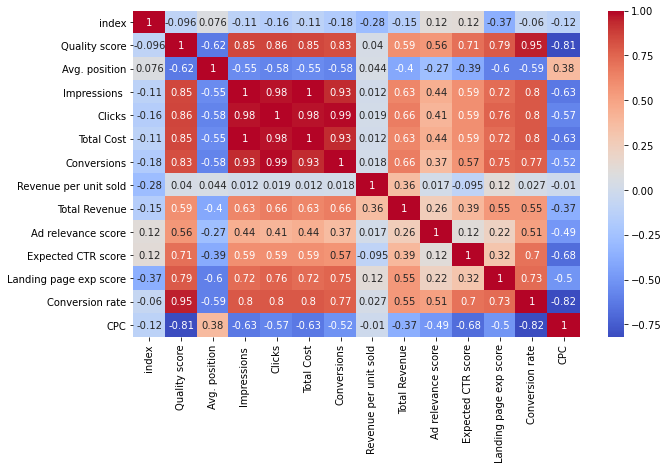

In [48]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

C:\Users\tuneG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quality score', ylabel='CPC'>

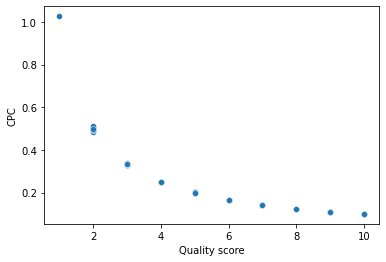

In [49]:
sns.scatterplot(df['Quality score'], df['CPC'])